In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import sys
import random

# Gramáticas

En esta sección quiero revisar cómo un automata lee reglas, escoge una regla aleatoriamente QUE SE PUEDA APLICAR y modifica el string de acuerdo a las reglas ya definidas. Con ello podemos encontrar además patrones de convergencia de los automatas 

In [4]:
myrules={"rawimputs":["X to aY","Y to ZZ","Z to bXa","X to c","Xa to cb","Z to a"]}
rules=pd.DataFrame(myrules)
#def Rules(inputs,outputs):
    

In [5]:
rules[["inputs","outputs"]]=rules["rawimputs"].str.split(" to ", expand=True)

In [6]:
rules

,rawimputs,inputs,outputs
0,X to aY,X,aY
1,Y to ZZ,Y,ZZ
2,Z to bXa,Z,bXa
3,X to c,X,c
4,Xa to cb,Xa,cb
5,Z to a,Z,a


In [7]:
def enterRules():
    executing=True
    listing=[]
    while executing:
        newrule=input("Please enter a new rule in the format X to Y or enter 0 to finish \t")
        if newrule != "0":
            if " to " in newrule:
                listing.append(newrule)
            else:
                print("Bad format, try again :)")
        else:
            executing=False
    dictionary={"rawinputs":listing}
    rules=pd.DataFrame(dictionary)
    rules[["inputs","outputs"]]=rules["rawinputs"].str.split(" to ", expand=True)
    rules.drop(columns=["rawinputs"],inplace=True)
    return rules

In [8]:
def ChainPath(rules, w,ITER):
    seed=w
    rules["input is in"]=rules["inputs"].apply(lambda x: x in seed)
    filtering=rules[rules["input is in"]==True]
    if len(filtering["inputs"])>0:
        choose=random.choice(filtering.index.to_numpy())
        print("Regla escogida: "+ rules["inputs"][choose] + " ---> " + rules["outputs"][choose])
        seed=seed.replace(rules["inputs"][choose],rules["outputs"][choose],1)
        print("Para la cadena ingresada tenemos que cambio por: " + seed + " \n en la iteración " + str(ITER))
    else:
        seed=seed
        print("Para la cadena ingresada tenemos SE QUEDO IGUAL: " + seed + " en la iteración " + str(ITER))
    return seed
    

In [9]:
rules.loc[[0],["outputs"]]


,outputs
0,aY


In [10]:
rules["outputs"][0]


'aY'

In [11]:
def generateStrFromRules(rules,Start,Nmax):
    iteration=0
    Chain=Start
    for i in range(Nmax):
        Chain=ChainPath(rules, Chain,iteration)
        iteration+=1
    return Chain

In [12]:
newrules=enterRules()

Please enter a new rule in the format X to Y or enter 0 to finish 	S to RT
Please enter a new rule in the format X to Y or enter 0 to finish 	R ro TR
Bad format, try again :)
Please enter a new rule in the format X to Y or enter 0 to finish 	R to TR
Please enter a new rule in the format X to Y or enter 0 to finish 	R to a
Please enter a new rule in the format X to Y or enter 0 to finish 	T to TR
Please enter a new rule in the format X to Y or enter 0 to finish 	T to b
Please enter a new rule in the format X to Y or enter 0 to finish 	0


In [13]:
newrules

,inputs,outputs
0,S,RT
1,R,TR
2,R,a
3,T,TR
4,T,b


In [14]:
ATTEMPT=generateStrFromRules(newrules,"SS",500)


Regla escogida: S ---> RT
Para la cadena ingresada tenemos que cambio por: RTS 
 en la iteración 0
Regla escogida: T ---> TR
Para la cadena ingresada tenemos que cambio por: RTRS 
 en la iteración 1
Regla escogida: T ---> b
Para la cadena ingresada tenemos que cambio por: RbRS 
 en la iteración 2
Regla escogida: R ---> TR
Para la cadena ingresada tenemos que cambio por: TRbRS 
 en la iteración 3
Regla escogida: T ---> TR
Para la cadena ingresada tenemos que cambio por: TRRbRS 
 en la iteración 4
Regla escogida: S ---> RT
Para la cadena ingresada tenemos que cambio por: TRRbRRT 
 en la iteración 5
Regla escogida: T ---> b
Para la cadena ingresada tenemos que cambio por: bRRbRRT 
 en la iteración 6
Regla escogida: T ---> b
Para la cadena ingresada tenemos que cambio por: bRRbRRb 
 en la iteración 7
Regla escogida: R ---> a
Para la cadena ingresada tenemos que cambio por: baRbRRb 
 en la iteración 8
Regla escogida: R ---> TR
Para la cadena ingresada tenemos que cambio por: baTRbRRb 
 en l

In [23]:
ATTEMPT

'aaabbabbbabaabbbabaaabaababababbaaabbababbabbaababbabbbaaabaabbaababbabbaaabaabaabbbabbabababbbbaaaababaabaabbabaaabbabababbabbabaababbabbaabbabbabaabbabaaaabbabbbabaaabbbbaabbaaabbbabbbaabaaabaabaababbaaabbabbbbabbbaabbaaabaabaababbbabbaaaabbababbaabaaabbaababbaabbabbababaabababbaabaaaabbabbaaaabbbbaabbaabbabaabababbaaaaabbabbbaababbbaabbbaaaabbaabbaabbbbaaabbaaaabbbabababbaabaaabbbababbabaaabbabaabaaaabbabbabbabababbbabaaabbbbaaabbaabababbbaaaabaabbbaababbbabbaabbaaabbabaaabaabbbabaaabbbabs'

In [15]:
def generate(rules,chain,assertterminals,size):
    newarray=[]
    for i in range(size):
        element=generateStrFromRules(rules,chain,assertterminals)
        newarray.append(element)
    return np.asarray(newarray)

In [16]:
STRINGS=generate(newrules,"SS",50,50)

Regla escogida: S ---> RT
Para la cadena ingresada tenemos que cambio por: RTS 
 en la iteración 0
Regla escogida: R ---> TR
Para la cadena ingresada tenemos que cambio por: TRTS 
 en la iteración 1
Regla escogida: S ---> RT
Para la cadena ingresada tenemos que cambio por: TRTRT 
 en la iteración 2
Regla escogida: R ---> TR
Para la cadena ingresada tenemos que cambio por: TTRTRT 
 en la iteración 3
Regla escogida: T ---> TR
Para la cadena ingresada tenemos que cambio por: TRTRTRT 
 en la iteración 4
Regla escogida: R ---> a
Para la cadena ingresada tenemos que cambio por: TaTRTRT 
 en la iteración 5
Regla escogida: R ---> TR
Para la cadena ingresada tenemos que cambio por: TaTTRTRT 
 en la iteración 6
Regla escogida: T ---> TR
Para la cadena ingresada tenemos que cambio por: TRaTTRTRT 
 en la iteración 7
Regla escogida: T ---> b
Para la cadena ingresada tenemos que cambio por: bRaTTRTRT 
 en la iteración 8
Regla escogida: T ---> b
Para la cadena ingresada tenemos que cambio por: bRabTR

In [17]:
STRINGS

array(['bbbbaaabbTTRaaaaabbbRabaaRRTRRR', 'abab',
       'babbbbbabbbbbbabaabaaTRaRbaT', 'babbbbaaab',
       'abbaabbbbbaabbbabaaa', 'abbabbbbbbbaabaTTaabbTTTTRRRTTTRT',
       'bbaabbabaabbbbababbba', 'bbabaabbab', 'abababbaaaa',
       'bbabbbabbbaaabaaabaa', 'bbaaababaabbabaaab',
       'ababbbbaabbaaaababbabbRTRRRaT', 'abbbaabbaabbbababbabTRaaRRba',
       'bbaaabbabaaaabbbbaaaaRabRbRR', 'bbabaabbababaaabTRRaTaTTRaaaaT',
       'abab', 'baabbbabaa', 'babbababbbbabbbRRaaaaabbTRRTRR', 'ababa',
       'bbaaaabaababbaaaabaabaRaTTTRT', 'abbaba',
       'abbbaabbbbbTTTaTTTaabRTRRTabTRRRRRT', 'babbabababbab',
       'bbbbaabbab', 'bbababbbaababbba', 'abbbaabbbbaababbaTRaaaaTTaTTa',
       'abaababbbaabaaaaabRRTTTRRRaaaa',
       'abaabbaabaTRaRaRTRRRTRTTTaaTRbRaRRb', 'bbbabbaba',
       'bbbabaabbbaaa', 'ababba', 'bbaabaababaaTabRTRaTTTaaaaabaT',
       'babbbbaaab', 'babbbbababbbRRTRRRTTTTRTaRaTRaTaaRT',
       'bbbbaabbaabbabaabaab', 'babbaaab', 'bbbaabaaabbbbbbaaabab',
       'abbaaab

In [36]:
operations=enterRules()

Please enter a new rule in the format X to Y or enter 0 to finish 	S to S + S 
Please enter a new rule in the format X to Y or enter 0 to finish 	S to S * S 
Please enter a new rule in the format X to Y or enter 0 to finish 	S to x 
Please enter a new rule in the format X to Y or enter 0 to finish 	S to y
Please enter a new rule in the format X to Y or enter 0 to finish 	0


In [41]:
STRINGS4=generate(operations,"S",10,50)

Regla escogida: S ---> y
Para la cadena ingresada tenemos que cambio por: y 
 en la iteración 0
Para la cadena ingresada tenemos SE QUEDO IGUAL: y en la iteración 1
Para la cadena ingresada tenemos SE QUEDO IGUAL: y en la iteración 2
Para la cadena ingresada tenemos SE QUEDO IGUAL: y en la iteración 3
Para la cadena ingresada tenemos SE QUEDO IGUAL: y en la iteración 4
Para la cadena ingresada tenemos SE QUEDO IGUAL: y en la iteración 5
Para la cadena ingresada tenemos SE QUEDO IGUAL: y en la iteración 6
Para la cadena ingresada tenemos SE QUEDO IGUAL: y en la iteración 7
Para la cadena ingresada tenemos SE QUEDO IGUAL: y en la iteración 8
Para la cadena ingresada tenemos SE QUEDO IGUAL: y en la iteración 9
Regla escogida: S ---> x 
Para la cadena ingresada tenemos que cambio por: x  
 en la iteración 0
Para la cadena ingresada tenemos SE QUEDO IGUAL: x  en la iteración 1
Para la cadena ingresada tenemos SE QUEDO IGUAL: x  en la iteración 2
Para la cadena ingresada tenemos SE QUEDO IGU

In [42]:
STRINGS4

array(['y', 'x ', 'x  * y * y  * y  + S   + S  + S ', 'x ', 'x ', 'x ',
       'x ', 'x ', 'y + y ', 'x  * x  * x   + S + S   * S  * S  + S  ',
       'y', 'x  + x   + y * S + S   + S   + S  * S ', 'y + y ',
       'x  + x  * y  + x   ', 'y', 'y', 'y', 'y',
       'x  * x  * y + y * y    ', 'x ', 'x ', 'x ', 'x  * y ',
       'y * x   * S + S  * S  * S   + S  + S  + S ', 'y',
       'y * x   + y + x  + y    + S ',
       'x  + x  + y  * S * S    * S  * S  * S ', 'x ',
       'x  + x  + y  + x  + S   * S   + S ',
       'y * y + x   + y + y  * S   ', 'x ',
       'y * x   + y + y * S  * S  + S   ',
       'x  * y  + y  + x   * S + S   + S ', 'x  + x  * x   ', 'y', 'x ',
       'y', 'y', 'x ', 'x  * x  * y * x  + S  + S  + S    ', 'y',
       'x  + y + x    * y ', 'x ', 'y', 'y',
       'y * y + x  + S + S  * S   * S    + S ', 'y',
       'y * y  * y * y * S * S  * S    ', 'y',
       'x  + y  * y  * x   + y * S  '], dtype='<U42')

In [44]:
import collections

print([item for item, count in collections.Counter(STRINGS4).items() if count > 1])

['y', 'x ', 'y + y ']


In [46]:
reglasnoambig=enterRules()

Please enter a new rule in the format X to Y or enter 0 to finish 	S to x
Please enter a new rule in the format X to Y or enter 0 to finish 	S to y
Please enter a new rule in the format X to Y or enter 0 to finish 	S to ( S + S )
Please enter a new rule in the format X to Y or enter 0 to finish 	S to ( S * S )
Please enter a new rule in the format X to Y or enter 0 to finish 	0


In [47]:
ATTEMPTnoambig=generateStrFromRules(reglasnoambig,"S",50)

Regla escogida: S ---> ( S + S )
Para la cadena ingresada tenemos que cambio por: ( S + S ) 
 en la iteración 0
Regla escogida: S ---> ( S + S )
Para la cadena ingresada tenemos que cambio por: ( ( S + S ) + S ) 
 en la iteración 1
Regla escogida: S ---> x
Para la cadena ingresada tenemos que cambio por: ( ( x + S ) + S ) 
 en la iteración 2
Regla escogida: S ---> ( S + S )
Para la cadena ingresada tenemos que cambio por: ( ( x + ( S + S ) ) + S ) 
 en la iteración 3
Regla escogida: S ---> y
Para la cadena ingresada tenemos que cambio por: ( ( x + ( y + S ) ) + S ) 
 en la iteración 4
Regla escogida: S ---> y
Para la cadena ingresada tenemos que cambio por: ( ( x + ( y + y ) ) + S ) 
 en la iteración 5
Regla escogida: S ---> y
Para la cadena ingresada tenemos que cambio por: ( ( x + ( y + y ) ) + y ) 
 en la iteración 6
Para la cadena ingresada tenemos SE QUEDO IGUAL: ( ( x + ( y + y ) ) + y ) en la iteración 7
Para la cadena ingresada tenemos SE QUEDO IGUAL: ( ( x + ( y + y ) ) + y ) 

In [48]:
booleans=enterRules()

Please enter a new rule in the format X to Y or enter 0 to finish 	S to p
Please enter a new rule in the format X to Y or enter 0 to finish 	S to q
Please enter a new rule in the format X to Y or enter 0 to finish 	S to r
Please enter a new rule in the format X to Y or enter 0 to finish 	S to ( S and S )
Please enter a new rule in the format X to Y or enter 0 to finish 	S to ( S or S )
Please enter a new rule in the format X to Y or enter 0 to finish 	S to  ( not S ) 
Please enter a new rule in the format X to Y or enter 0 to finish 	0


In [52]:
ATTEMPTbooleans=generateStrFromRules(booleans,"S",50)

Regla escogida: S --->  ( not S ) 
Para la cadena ingresada tenemos que cambio por:  ( not S )  
 en la iteración 0
Regla escogida: S ---> ( S or S )
Para la cadena ingresada tenemos que cambio por:  ( not ( S or S ) )  
 en la iteración 1
Regla escogida: S --->  ( not S ) 
Para la cadena ingresada tenemos que cambio por:  ( not (  ( not S )  or S ) )  
 en la iteración 2
Regla escogida: S --->  ( not S ) 
Para la cadena ingresada tenemos que cambio por:  ( not (  ( not  ( not S )  )  or S ) )  
 en la iteración 3
Regla escogida: S ---> q
Para la cadena ingresada tenemos que cambio por:  ( not (  ( not  ( not q )  )  or S ) )  
 en la iteración 4
Regla escogida: S ---> ( S or S )
Para la cadena ingresada tenemos que cambio por:  ( not (  ( not  ( not q )  )  or ( S or S ) ) )  
 en la iteración 5
Regla escogida: S --->  ( not S ) 
Para la cadena ingresada tenemos que cambio por:  ( not (  ( not  ( not q )  )  or (  ( not S )  or S ) ) )  
 en la iteración 6
Regla escogida: S ---> ( S a

# Punto 7.4 Sipser

Usamos los métodos implementados en la parte superior para crear las reglas

In [18]:
newrules

,inputs,outputs,input is in
0,S,RT,False
1,R,TR,True
2,R,a,True
3,T,TR,True
4,T,b,True


In [57]:
def sipserproof(string,rules):
    TAPE=str(string)
    n=len(TAPE)
    Table=np.empty((n,n),dtype=str)
    for char in TAPE:
        if char == "":
            if(rules[rules["inputs"].str.contains("S")][0]["outputs"]==""):
                TAPE=TAPE+""
        for i in range(n):
            for var in rules["inputs"]:
                TEMPORAL=rules[rules["inputs"].str.contains(var)]
                filt=TEMPORAL[TEMPORAL["outputs"]==TAPE[i]]
                #print(filt.empty)
                if(not (filt.empty)):
                    Table[i][i]=str(var)
    for l in range(1,n):
        for i in range(1,n-(l-1)):
            j=i+l-1
            for k in range(i,j):
                for element in rules.iterrows():
                    out=element[1][1]
                    ins=element[1][0]
                    #print(type(out))
                    #print(i,j,k,l)
                    if(str(out[0]) in str(Table[i][k]) and str(out[1]) in str(Table[k+1][j])):
                        Table[i][j]=ins
    return Table

In [58]:
sipserproof("baba",newrules)

array([['T', '', '', ''],
       ['', 'R', 'S', 'S'],
       ['', '', 'T', 'T'],
       ['', '', '', 'R']], dtype='<U1')

# Visualización del punto 1 y 2 de la tarea

In [116]:
def determine_c(f,g):
    threshold=1000
    natural_range=np.linspace(1,1000,100,dtype=np.int64)
    for i in range(threshold):
        bol=False
        save=0
        for j in natural_range:
            if i*g(j)>f(j):
                bol=True
                #print(j)
            if(i*g(j)<f(j)):
                bol=False
        if bol==True:
            plt.plot(natural_range,(i+60)*g(natural_range),label=str(g) )
            plt.plot(natural_range,f(natural_range),label=str(f))
            plt.legend()
            return i
    return -1


In [117]:
def flexfunction1(x):
    return x**2

def flexfunction2(y):
    return 13*y+factorial(y)

def flexfunction3(x):
    return 60*np.log(x)**3

def flexfunction4(x):
    return x

20

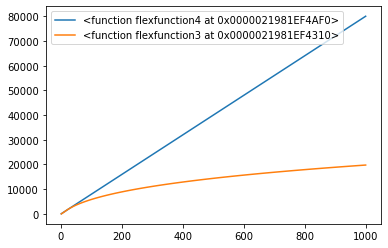

In [118]:
determine_c(flexfunction3,flexfunction4)

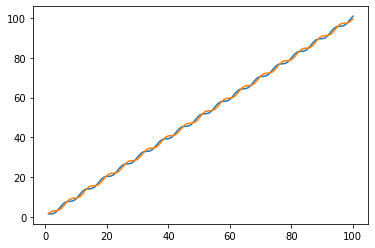

In [119]:
rango=np.linspace(1,100,100,dtype=np.int64)
plt.plot(rango,rango+np.cos(rango))
plt.plot(rango,rango+np.sin(rango))